<a href="https://colab.research.google.com/github/sreeniedp/Coursera_ML_Assignments/blob/master/New_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
df= pd.read_csv ('MFL_data_sorted.csv', index_col= False)

In [6]:
df

,State,Ct_Date,Day,Ct_Time,GLPLNOS
0,Andhra Pradesh,2017-12-11,Monday,10.0,91.0
1,Andhra Pradesh,2017-12-11,Monday,12.0,1117.0
2,Andhra Pradesh,2017-12-11,Monday,14.0,2708.0
3,Andhra Pradesh,2017-12-11,Monday,16.0,3761.0
4,Andhra Pradesh,2017-12-11,Monday,18.0,4591.0
...,...,...,...,...,...
83091,Rajasthan,2020-01-27,Monday,20.0,453.0
83092,Rajasthan,2020-01-27,Monday,22.0,453.0
83093,Rajasthan,2020-01-28,Tuesday,10.0,1.0
83094,Rajasthan,2020-01-28,Tuesday,12.0,76.0


In [3]:
df1_pvt=pd.pivot_table(df.reset_index(),index=['Ct_Date'],columns=['Ct_Time'],values='GLPLNOS', aggfunc='sum', fill_value=0)

In [5]:
df1_pvt


Ct_Time,10.0,12.0,14.0,16.0,18.0,20.0,22.0
Ct_Date,,,,,,,
2017-12-11,469,5430,12332,17223,20809,20871,0
2017-12-12,417,4433,9008,12799,15594,15672,0
2017-12-13,320,4432,9285,13204,16223,16299,0
2017-12-14,354,4141,8730,12539,15455,15553,0
2017-12-15,352,3876,8074,11711,14661,14759,0
...,...,...,...,...,...,...,...
2020-12-26,363,5702,12304,17613,20884,20901,20901
2020-12-28,483,6796,14383,20715,24917,24958,24958
2020-12-29,382,5032,10994,16049,19282,19301,19301


In [7]:
df10=df1_pvt.iloc[:,0]

In [8]:
df10.shape

(958,)

In [9]:
df10

Ct_Date
2017-12-11    469
2017-12-12    417
2017-12-13    320
2017-12-14    354
2017-12-15    352
             ... 
2020-12-26    363
2020-12-28    483
2020-12-29    382
2020-12-30    464
2020-12-31    414
Name: 10.0, Length: 958, dtype: int64

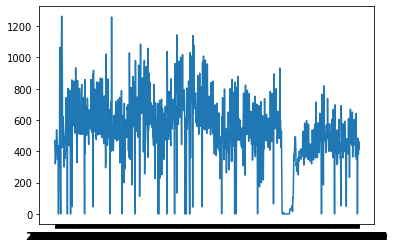

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df10)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df10=scaler.fit_transform(np.array(df10).reshape(-1,1))

In [14]:
df10

array([[3.71338084e-01],
       [3.30166271e-01],
       [2.53365004e-01],
       [2.80285036e-01],
       [2.78701504e-01],
       [3.62628662e-01],
       [4.25178147e-01],
       [3.80839272e-01],
       [3.71338084e-01],
       [3.22248614e-01],
       [2.75534442e-01],
       [2.78701504e-01],
       [0.00000000e+00],
       [3.45209818e-01],
       [3.44418052e-01],
       [2.38321457e-01],
       [8.42438638e-01],
       [7.96516231e-01],
       [1.28266033e-01],
       [0.00000000e+00],
       [6.02533650e-01],
       [8.28978622e-01],
       [1.00000000e+00],
       [8.19477435e-01],
       [7.40300871e-01],
       [3.34916865e-01],
       [4.91686461e-01],
       [4.75851148e-01],
       [4.14885194e-01],
       [3.71338084e-01],
       [2.37529691e-01],
       [3.23040380e-01],
       [2.81076801e-01],
       [3.92715756e-01],
       [3.86381631e-01],
       [4.64766429e-01],
       [5.88281869e-01],
       [4.16468725e-01],
       [3.17498021e-01],
       [4.53681710e-01],


In [15]:
train_size=int (len(df10)*.65)
test_size=(len(df10)-train_size)

In [16]:
train_data, test_data=df10[0:train_size,:],df10[train_size:len(df10),:1]

In [17]:
import numpy as np
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
  dataX,dataY= [],[]

  for i in range (len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX),np.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4 for time step 3
time_step=100
X_train, y_train= create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [19]:
# reshape input to be [sample,time_steps,features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [20]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 7s 315ms/step - loss: 0.1535 - val_loss: 0.0229
Epoch 2/100
9/9 [==============================] - 2s 166ms/step - loss: 0.0307 - val_loss: 0.0125
Epoch 3/100
9/9 [==============================] - 2s 171ms/step - loss: 0.0245 - val_loss: 0.0177
Epoch 4/100
9/9 [==============================] - 2s 171ms/step - loss: 0.0236 - val_loss: 0.0129
Epoch 5/100
9/9 [==============================] - 2s 172ms/step - loss: 0.0255 - val_loss: 0.0155
Epoch 6/100
9/9 [==============================] - 1s 167ms/step - loss: 0.0258 - val_loss: 0.0133
Epoch 7/100
9/9 [==============================] - 2s 177ms/step - loss: 0.0238 - val_loss: 0.0160
Epoch 8/100
9/9 [==============================] - 2s 173ms/step - loss: 0.0248 - val_loss: 0.0144
Epoch 9/100
9/9 [==============================] - 1s 167ms/step - loss: 0.0235 - val_loss: 0.0143
Epoch 10/100
9/9 [==============================] - 2s 174ms/step - loss: 0.0213 - val_loss: 0.0141
Epoch 11/

In [24]:
#Prediction and check performance metircs

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [27]:
#transform to original form

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


0.1531402866435679

In [29]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

0.11214380873783471

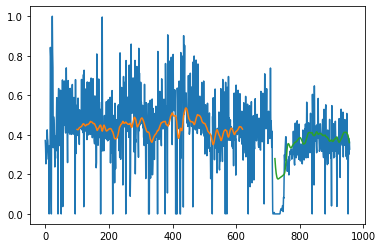

In [30]:
###plotting
# shift train  predictions for plotting
look_back=100
train_predictplot=np.empty_like(df10)
train_predictplot[:,:]=np.nan
train_predictplot[look_back:len(train_predict)+look_back,:]=train_predict


# shift test  predictions for plotting
look_back=100
test_predictplot=np.empty_like(df10)
test_predictplot[:,:]=np.nan
test_predictplot[len(train_predict)+(look_back*2)+1:len(df10)-1,:]=test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(df10))
plt.plot(train_predictplot)
plt.plot(test_predictplot)
plt.show()

In [31]:
len(test_data)

336

In [37]:
X_input=test_data[236:].reshape(1,-1)
X_input.shape

(1, 100)

In [39]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.5843230403800475,
 0.39509105304829767,
 0.38796516231195566,
 0.3721298495645289,
 0.3167062549485352,
 0.32779097387173395,
 0.4560570071258907,
 0.45288994457640536,
 0.37846397466349957,
 0.3475851148060174,
 0.334916864608076,
 0.3167062549485352,
 0.4014251781472684,
 0.4180522565320665,
 0.47822644497228817,
 0.38558986539984164,
 0.3079968329374505,
 0.2850356294536817,
 0.5288994457640538,
 0.36262866191607285,
 0.40459224069675376,
 0.35946159936658745,
 0.0,
 0.5225653206650831,
 0.5518606492478226,
 0.32858273950910527,
 0.3151227236737925,
 0.33570863024544734,
 0.28741092636579574,
 0.2494061757719715,
 0.4243863816310372,
 0.2557403008709422,
 0.34520981789390337,
 0.31908155186064924,
 0.30482977038796516,
 0.3404592240696754,
 0.47822644497228817,
 0.31274742676167855,
 0.36183689627870147,
 0.33729216152019,
 0.28186856690419637,
 0.2889944576405384,
 0.04038004750593824,
 0.547901821060966,
 0.4164687252573238,
 0.31908155186064924,
 0.34520981789390337,
 0.342042

In [43]:
#demonstrate prediction for next 10 days

from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
      if (len(temp_input)>100):
        X_input=np.array(temp_input[1:])
        print("{}day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input=X_input.reshape(1,n_steps,1)
        #print(X_input)
        yhat=model.predict(X_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist)
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
      else:
        X_input=X_input.reshape((1,n_steps,1))
        yhat=model.predict(X_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print (lst_output)
        



0day input [0.39509105 0.38796516 0.37212985 0.31670625 0.32779097 0.45605701
 0.45288994 0.37846397 0.34758511 0.33491686 0.31670625 0.40142518
 0.41805226 0.47822644 0.38558987 0.30799683 0.28503563 0.52889945
 0.36262866 0.40459224 0.3594616  0.         0.52256532 0.55186065
 0.32858274 0.31512272 0.33570863 0.28741093 0.24940618 0.42438638
 0.2557403  0.34520982 0.31908155 0.30482977 0.34045922 0.47822644
 0.31274743 0.3618369  0.33729216 0.28186857 0.28899446 0.04038005
 0.54790182 0.41646873 0.31908155 0.34520982 0.34204276 0.45605701
 0.2834521  0.33808393 0.34283452 0.31670625 0.37608868 0.46872526
 0.39271576 0.37529691 0.28978622 0.29136975 0.03800475 0.38004751
 0.36342043 0.36104513 0.33333333 0.30324624 0.38083927 0.48218527
 0.34837688 0.38321457 0.18448139 0.41567696 0.3570863  0.52969121
 0.36579572 0.45764054 0.39904988 0.34679335 0.41092637 0.51464766
 0.28820269 0.46555819 0.36025337 0.34758511 0.44655582 0.47743468
 0.41092637 0.39509105 0.39271576 0.29057799 0.3222

TypeError: ignored